In [39]:
########################
# IMPORTAMOS LOS DATOS #
########################
import pandas as pd

data = pd.read_csv("../../data/data_cleaned.csv")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [40]:
##############################
# CREAMOS GRUPOS DE INGRESOS #
##############################

def clasificar_ingreso(ingreso):
    if ingreso < 10000:
        return "Bajo"
    elif ingreso < 50000:
        return "Medio"
    elif ingreso < 70000:
        return "Alto"
    else:
        return "Muy Alto"

data["Grupo_ingresos"] = data["Income"].apply(clasificar_ingreso)

data[["Income", "Grupo_ingresos"]].head()

,Income,Grupo_ingresos
0,58138.0,Alto
1,46344.0,Medio
2,71613.0,Muy Alto
3,26646.0,Medio
4,58293.0,Alto


In [44]:

##########################
# GRUPOS QUE MAS COMPRAN #
##########################

productos = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

gasto_total_por_grupo = data.groupby("Grupo_ingresos")[productos].sum()

for producto in productos:
    max_grupo = ""
    max_gasto = 0

    for grupo in gasto_total_por_grupo.index: 
        if gasto_total_por_grupo.loc[grupo, producto] > max_gasto:
            max_gasto = gasto_total_por_grupo.loc[grupo, producto]
            max_grupo = grupo 

    print(f"El grupo que más compra {producto} es: {max_grupo}")

El grupo que más compra MntWines es: Muy Alto
El grupo que más compra MntFruits es: Muy Alto
El grupo que más compra MntMeatProducts es: Muy Alto
El grupo que más compra MntFishProducts es: Muy Alto
El grupo que más compra MntSweetProducts es: Muy Alto
El grupo que más compra MntGoldProds es: Alto


In [48]:

#######################
# ORDENAR Y RENOMBRAR #
#######################

orden_grupos = ["Muy Alto", "Alto", "Medio", "Bajo"]
gasto_total_por_grupo = gasto_total_por_grupo.loc[orden_grupos]


nombres_productos = {
    "MntWines": "Vino",
    "MntFruits": "Frutas",
    "MntMeatProducts": "Carne",
    "MntFishProducts": "Pescado",
    "MntSweetProducts": "Dulces",
    "MntGoldProds": "Productos de lujo"
}
gasto_total_por_grupo = gasto_total_por_grupo.rename(columns=nombres_productos)



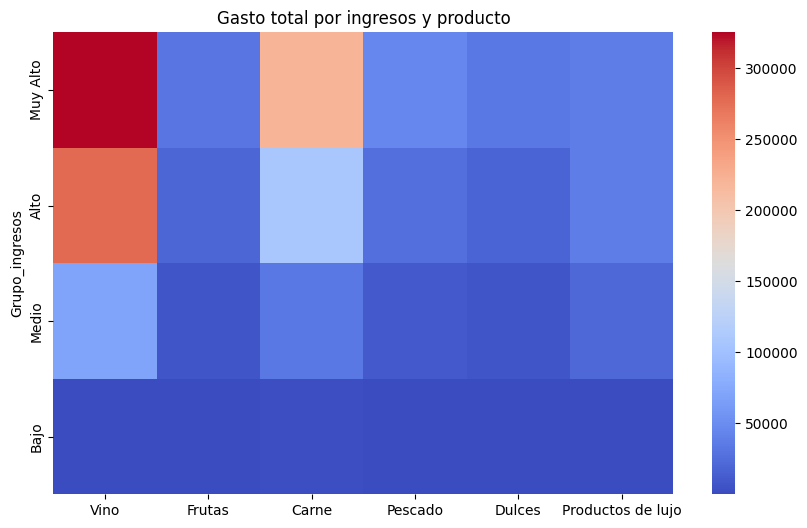

In [49]:
#################################
# GRÁFICO DE GASTO POR PRODUCTO #
#################################

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(gasto_total_por_grupo, cmap="coolwarm")

plt.title("Gasto total por ingresos y producto")
plt.show()
